# Titanic - Machine Learning from Disaster - R

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## LOAD DATA

In [2]:
# train_data <- read_csv(".\\input\\train.csv")
train_data <- read_csv("./input/train.csv")
# test_data <- read_csv(".\\input\\test.csv")
test_data <- read_csv("./input/test.csv")

Rows: 891 Columns: 12
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Name, Sex, Ticket, Cabin, Embarked
dbl (7): PassengerId, Survived, Pclass, Age, SibSp, Parch, Fare

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 418 Columns: 11
── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Name, Sex, Ticket, Cabin, Embarked
dbl (6): PassengerId, Pclass, Age, SibSp, Parch, Fare

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## A LOOK AT DATA

In [3]:
head(train_data, n=10)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NA,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NA,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NA,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,NA,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NA,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NA,S


In [4]:
head(test_data, n=10)

PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NA,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NA,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NA,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NA,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NA,S
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NA,S
898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NA,Q
899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NA,S
900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NA,C


In [5]:
combined <- list(train_data, test_data)
combined

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NA,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NA,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NA,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,NA,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NA,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NA,S


In [6]:
# train_data%>%
#     summarize_all(~sum(is.na(.)))
summarize_all(train_data, ~sum(is.na(.)))
## 很难相信r里的lambda是用~，不用lambda怎么传func捏

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,177,0,0,0,0,687,2


## DESCRIBE DATA DESTRIBUTION

In [7]:
summary(train_data)

  PassengerId       Survived          Pclass          Name          
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000   Length:891        
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median :446.0   Median :0.0000   Median :3.000   Mode  :character  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309                     
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :891.0   Max.   :1.0000   Max.   :3.000                     
                                                                    
     Sex                 Age            SibSp           Parch       
 Length:891         Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 Class :character   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000  
 Mode  :character   Median :28.00   Median :0.000   Median :0.0000  
                    Mean   :29.70   Mean   :0.523   Mean   :0.3816  
                    3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                    Max.   :80.00 

## SOME ASSUMPTIONS PROVIDED WITH THE DATASET
- Women (`Sex=female`) were more likely to have survived
- Children (`Age < ?`) were more likely to have survived
- The upper-class passengers (`Pclass=1`) were more likely to have survived

In [8]:
train_data %>%
#     select(Pclass, Survived) %>%
    group_by(Pclass)%>%
    summarize(Survived = mean(Survived))

Pclass,Survived
<dbl>,<dbl>
1,0.6296296
2,0.4728261
3,0.2423625


In [9]:
train_data %>%
    group_by(Sex) %>%
    summarize(Survived = mean(Survived))

Sex,Survived
<chr>,<dbl>
female,0.7420382
male,0.1889081


In [10]:
train_data %>%
    group_by(SibSp) %>%
    summarize(Survived = mean(Survived))

SibSp,Survived
<dbl>,<dbl>
0,0.3453947
1,0.5358852
2,0.4642857
3,0.2500000
4,0.1666667
5,0.0000000
8,0.0000000


In [11]:
train_data %>%
    group_by(Parch) %>%
    summarize(Survived = mean(Survived))

Parch,Survived
<dbl>,<dbl>
0,0.3436578
1,0.5508475
2,0.5000000
3,0.6000000
4,0.0000000
5,0.2000000
6,0.0000000


## SOME VISUALIZATIONS
- to show relationships between variables

### Visualizing numerical variable (`Age`)

Warning message:
“Removed 177 rows containing non-finite values (`stat_bin()`).”


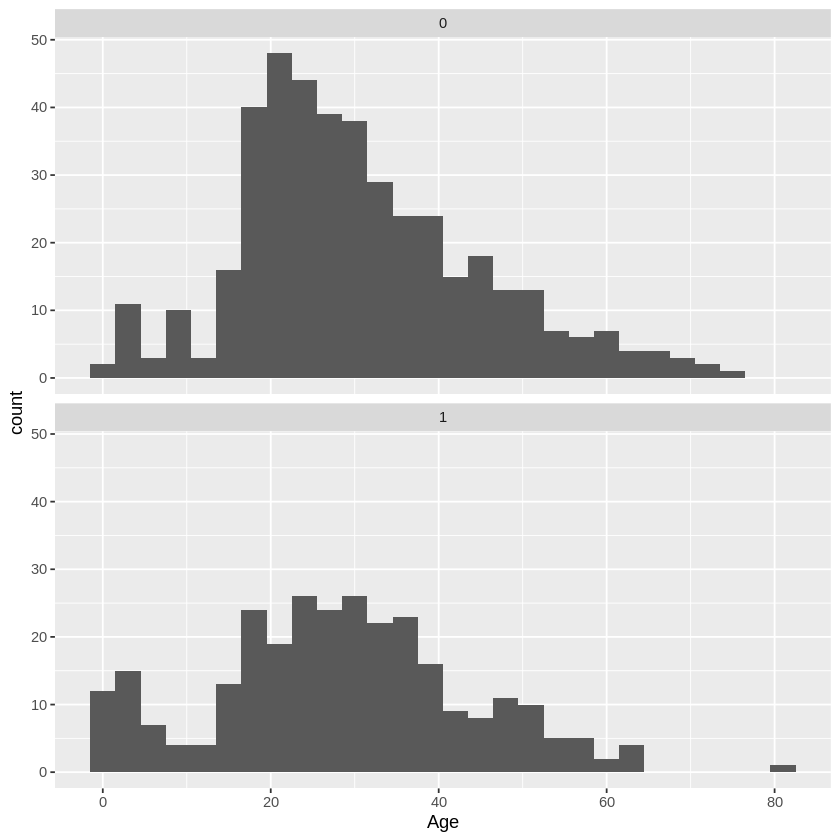

In [12]:
train_data %>%
    ggplot() +
    geom_histogram(mapping=aes(x=Age), binwidth=3)+
    facet_wrap(vars(Survived), nrow=2)

### Visualizing ordinal variable (`Pclass`)

Warning message:
“Removed 177 rows containing non-finite values (`stat_bin()`).”


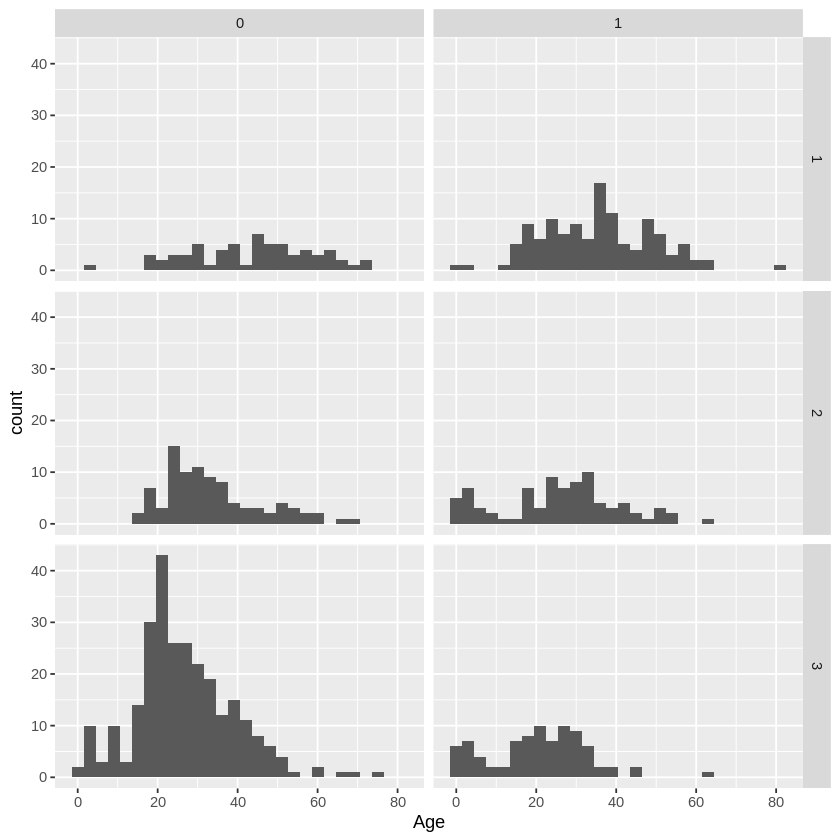

In [13]:
train_data %>%
    ggplot() +
    geom_histogram(mapping=aes(x=Age), binwidth=3)+
    facet_grid(rows=vars(Pclass), cols=vars(Survived))

### Visualizing categorical variable (`Embarked`)

- Plots here are accurate, plot for `Embarked == 'C'` in Py version is wrong with the color.

`summarise()` has grouped output by 'Embarked', 'Pclass'. You can override using the `.groups` argument.


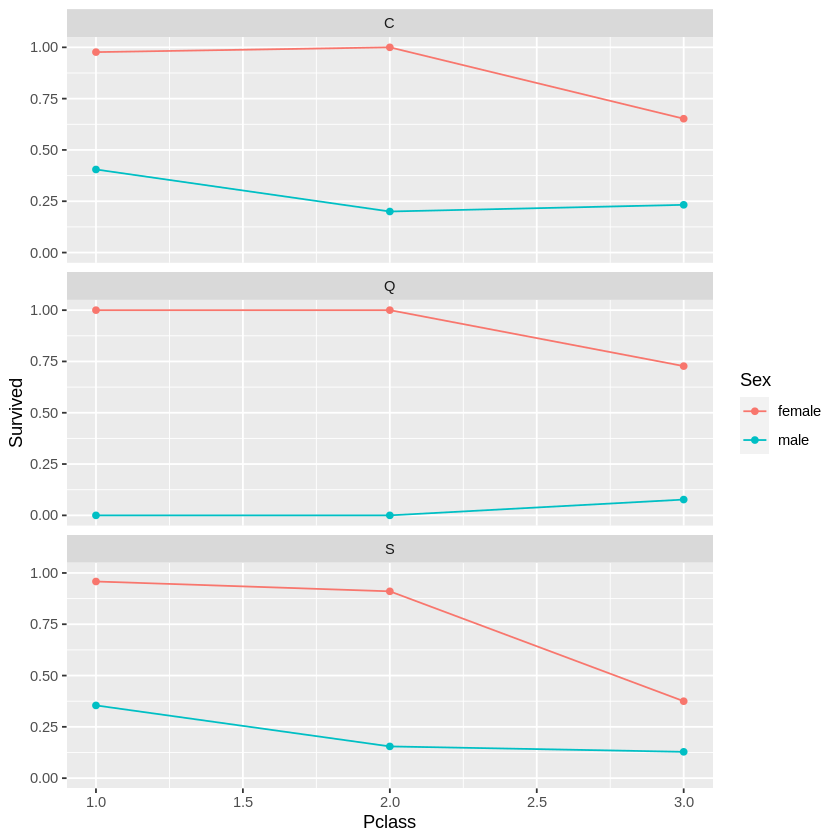

In [14]:
train_data %>%
    filter(!is.na(Embarked))%>%
#     filter(Embarked == 'C') %>%
#     filter(Sex == "male") %>%
#     filter(Pclass == 2)
    group_by(Embarked, Pclass, Sex) %>%
    summarize(Survived = mean(Survived)) %>%
    ggplot() +
    geom_point(mapping=aes(x=Pclass, y=Survived, color=Sex))+
    geom_line(mapping=aes(x=Pclass, y=Survived, color=Sex))+
    facet_wrap(vars(Embarked), nrow=3)

### Correlate categorical features and numeric features
- 没什么用的图，不画了

## DROP SOME VARIABLES (`Ticket`, `Cabin`)
- messy data, and not really useful

In [15]:
train_data = train_data %>% select(-Ticket, -Cabin)
test_data = test_data %>% select(-Ticket, -Cabin)
combined = list(train_data, test_data)

## CREATE NEW FEATURE

### Extract Title from Name

In [16]:
for (i in seq_along(combined)){
    combined[[i]] <- mutate(combined[[i]], Title = str_extract(Name, "([A-Za-z]+)\\."))
#     print(typeof(combined[[i]]))
}

# mutate(train_data, Title = str_extract(Name, "([A-Za-z]+)\\."))
# mutate(test_data, Title = str_extract(Name, "([A-Za-z]+)\\."))
# combined <- lst(train_data, test_data)
train_data <- combined[[1]]
test_data <- combined[[2]]
# print(is_tibble(combined[[1]]))

- need to figure out difference between `lst()` and `list()`
- need to figure out how to put two tibbles in one collection, and manipulate them using loops
    - use alist[[1]] to get the first element, but why?
    - https://stackoverflow.com/questions/21091202/how-to-index-an-element-of-a-list-object-in-r
    - https://stackoverflow.com/questions/1169456/the-difference-between-bracket-and-double-bracket-for-accessing-the-el


In [17]:
head(train_data, n=10)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,S,Mr.
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,71.2833,C,Mrs.
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,S,Miss.
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,S,Mrs.
5,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,S,Mr.
6,0,3,"Moran, Mr. James",male,NA,0,0,8.4583,Q,Mr.
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,51.8625,S,Mr.
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,21.0750,S,Master.
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,11.1333,S,Mrs.


In [18]:
train_data %>%
    group_by(Title,Sex) %>%
    summarize(count = n())

`summarise()` has grouped output by 'Title'. You can override using the `.groups` argument.


Title,Sex,count
<chr>,<chr>,<int>
Capt.,male,1
Col.,male,2
Countess.,female,1
Don.,male,1
Dr.,female,1
Dr.,male,6
Jonkheer.,male,1
Lady.,female,1
Major.,male,2


In [19]:
## used to test converting NA into factor(0)
# train_data$Title[1] <- NA
# train_data$Title
# combined = list(train_data, test_data)

In [20]:

## put many titles with a more common name
for (i in seq_along(combined)) {
    combined[[i]] <- combined[[i]] %>%
        mutate(Title = ifelse(Title %in% c('Lady.', 'Countess.', 'Capt.', 'Col.', 'Don.', 'Dr.',
                                   'Major.', 'Rev.', 'Sir.', 'Jonkheer.', 'Dona.'), "Rare.", Title)) %>%
        mutate(Title = ifelse(Title %in% c("Mlle.", "Ms."), "Miss.", Title))%>%
        mutate(Title = ifelse(Title == "Mme.", "Mrs.", Title))
}
train_data <- combined[[1]]
test_data <- combined[[2]]
train_data %>%
    group_by(Title) %>%
    summarize(Survived = mean(Survived))

Title,Survived
<chr>,<dbl>
Master.,0.5750000
Miss.,0.7027027
Mr.,0.1566731
Mrs.,0.7936508
Rare.,0.3478261


In [21]:
## convert categorical Title into ordinal
for (i in seq_along(combined)) {
    combined[[i]] <- combined[[i]] %>%
        mutate(Title = recode(Title, "Mr."="1", "Miss."="2",
                                     "Mrs."="3", "Master."="4",
                                     "Rare."="5"))
    combined[[i]]$Title[is.na(combined[[i]]$Title)]  <-  0
    combined[[i]]$Title <- as.factor(combined[[i]]$Title)
}
train_data = combined[[1]]
test_data = combined[[2]]

train_data%>%
    group_by(Title)%>%
    summarize(n=n())

Title,n
<fct>,<int>
1,517
2,185
3,126
4,40
5,23


In [22]:
head(train_data, n=10)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,71.2833,C,3
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,S,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,S,3
5,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,S,1
6,0,3,"Moran, Mr. James",male,NA,0,0,8.4583,Q,1
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,51.8625,S,1
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,21.0750,S,4
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,11.1333,S,3


## CONTINUE DROPPING FEATURES
- `Name` now replaced by `Title`
- drop `PassengerId`

In [23]:
train_data <- train_data %>% select(-Name, -PassengerId)
test_data <- test_data %>% select(-Name, -PassengerId)
combined = list(train_data, test_data)
print(dim(train_data))
print(dim(test_data))

[1] 891   9
[1] 418   8


## Represent `Sex` with 0/1

In [24]:
for (i in seq_along(combined)) {
    combined[[i]] <- combined[[i]] %>%
        mutate(Sex = recode(Sex, female='0', male='1'))
#         combined[[i]]$Sex[is.na(combined[[i]]$Sex)]  <-  0
#         combined[[i]]$Sex <- as.factor(combined[[i]]$Sex)
}
train_data <- combined[[1]]
test_data <- combined[[2]]
head(train_data, n=10)

Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
0,3,1,22,1,0,7.2500,S,1
1,1,0,38,1,0,71.2833,C,3
1,3,0,26,0,0,7.9250,S,2
1,1,0,35,1,0,53.1000,S,3
0,3,1,35,0,0,8.0500,S,1
0,3,1,NA,0,0,8.4583,Q,1
0,1,1,54,0,0,51.8625,S,1
0,3,1,2,3,1,21.0750,S,4
1,3,0,27,0,2,11.1333,S,3


## FILL `NA`s
### Fill `NA`s in `Age`

In [25]:
guess_ages <- array(data=0, dim=c(2, 3))
for (i in 1:2) {
    for (j in 1:3) {
        a <- train_data %>%
            filter(Sex == as.character(i-1), Pclass == j)
        b <- test_data %>%
            filter(Sex == as.character(i-1), Pclass == j)
        guess_ages[i, j] <- median(c(a$Age, b$Age), na.rm=TRUE)
#     print(guess_ages[i,j] + i + j)
    }
}
guess_ages
# median(c(train_data$Age, test_data$Age), na.rm=TRUE)
# a <- train_data %>%
#     filter(Sex=='0', Pclass==1)
# a

36,28.0,22
42,29.5,25


In [26]:
for (k in seq_along(combined)) {
    for (i in 1:2) {
        for (j in 1:3) {
            combined[[k]] <- combined[[k]] %>%
                mutate(Age = if_else(Sex == as.character(i-1) & Pclass == j & is.na(Age),
                                    guess_ages[i, j], Age))
        }
    }
}
train_data <- combined[[1]]
test_data <- combined[[2]]

In [27]:
train_data %>%
#     mutate(Age = cut(Age, breaks=5, labels=c('0', '1', '2', '3', '4')))
    mutate(AgeBand = cut(Age, breaks=5)) %>%
    group_by(AgeBand) %>%
    summarize(Survived = mean(Survived))

AgeBand,Survived
<fct>,<dbl>
"(0.34,16.3]",0.55000000
"(16.3,32.3]",0.33671400
"(32.3,48.2]",0.41284404
"(48.2,64.1]",0.43478261
"(64.1,80.1]",0.09090909


In [28]:
for (i in seq_along(combined)) {
    combined[[i]] <- combined[[i]]%>%
        mutate(Age = cut(Age, breaks=c(0, 16, 32, 48, 64, 80), labels=c('0', '1', '2', '3', '4'),
                        include.lowest=TRUE))
}
train_data <- combined[[1]]
test_data <- combined[[2]]
head(test_data, n=10)

Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
<dbl>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
3,1,2,0,0,7.8292,Q,1
3,0,2,1,0,7.0000,S,3
2,1,3,0,0,9.6875,Q,1
3,1,1,0,0,8.6625,S,1
3,0,1,1,1,12.2875,S,3
3,1,0,0,0,9.2250,S,1
3,0,1,0,0,7.6292,Q,2
2,1,1,1,1,29.0000,S,1
3,0,1,0,0,7.2292,C,3


## CREATE NEW FEATURE COMBINING EXISTING FEATURES
### Create `IsAlone` and replace `Parch` and `SibSp`

In [29]:
for (i in seq_along(combined)) {
    combined[[i]] <- combined[[i]] %>%
        mutate(FamilySize = SibSp + Parch + 1)
}
train_data <- combined[[1]]
test_data <- combined[[2]]

In [30]:
train_data%>%
    group_by(FamilySize) %>%
    summarize(Survived = mean(Survived))%>%
    arrange(desc(Survived))

FamilySize,Survived
<dbl>,<dbl>
4,0.7241379
3,0.5784314
2,0.5527950
7,0.3333333
1,0.3035382
5,0.2000000
6,0.1363636
8,0.0000000
11,0.0000000


In [31]:
## replace `Parch`, `SibSp`, `FamilySize` with `IsAlone`
train_data <- train_data %>%
    mutate(IsAlone = if_else(FamilySize == 1, 1, 0)) %>%
    select(-Parch, -SibSp, -FamilySize)
test_data <- test_data %>%
    mutate(IsAlone = if_else(FamilySize == 1, 1, 0)) %>%
    select(-Parch, -SibSp, -FamilySize)
combined <- list(train_data, test_data)

### Create a feature combining `Pclass` and `Age`
- why???

In [32]:
for (i in seq_along(combined)) {
    combined[[i]] <- combined[[i]] %>%
        mutate(Age_Pclass = (as.numeric(Age) - 1) * Pclass)
}
train_data <- combined[[1]]
test_data <- combined[[2]]
head(train_data, n=10)

Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age_Pclass
<dbl>,<dbl>,<chr>,<fct>,<dbl>,<chr>,<fct>,<dbl>,<dbl>
0,3,1,1,7.2500,S,1,0,3
1,1,0,2,71.2833,C,3,0,2
1,3,0,1,7.9250,S,2,1,3
1,1,0,2,53.1000,S,3,0,2
0,3,1,2,8.0500,S,1,1,6
0,3,1,1,8.4583,Q,1,1,3
0,1,1,3,51.8625,S,1,1,3
0,3,1,0,21.0750,S,4,0,0
1,3,0,1,11.1333,S,3,0,3


### Fill `NA`s in `Embarked`

In [33]:
port <- train_data %>%
    group_by(Embarked) %>%
    summarize(ct=n()) %>%
    arrange(desc(ct))
port <- port$Embarked[1]
for (i in seq_along(combined)) {
    combined[[i]] <- combined[[i]] %>%
        mutate(Embarked = if_else(is.na(Embarked), port, Embarked)) %>%
        mutate(Embarked = recode(Embarked, S=0, C=1,Q=2))
}
train_data <- combined[[1]]
test_data <- combined[[2]]
train_data %>%
    group_by(Embarked) %>%
    summarize(n=n())

Embarked,n
<dbl>,<int>
0,646
1,168
2,77


### Fill `NA`s in `Fare` (in test dataset)

In [34]:
test_data <- test_data %>%
    mutate(Fare = if_else(is.na(Fare), median(Fare, na.rm=TRUE), Fare))
combined <- list(train_data, test_data)

In [35]:
## cut fare
train_data %>%
    mutate(FareBand = cut(Fare, breaks=c(quantile(Fare, probs=seq(0, 1, by=0.25))),
                         include.lowest=TRUE)) %>%
    group_by(FareBand) %>%
    summarize(Survived = mean(Survived))

FareBand,Survived
<fct>,<dbl>
"[0,7.91]",0.1973094
"(7.91,14.5]",0.3035714
"(14.5,31]",0.4549550
"(31,512]",0.5810811


In [36]:
for (i in seq_along(combined)) {
    combined[[i]] <- combined[[i]]%>%
        mutate(Fare = cut(Fare, breaks=c(quantile(Fare, probs=seq(0, 1, by=0.25))),
                          labels=c('0', '1', '2', '3'), include.lowest=TRUE))
}
train_data <- combined[[1]]
test_data <- combined[[2]]
head(test_data, n=10)

Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age_Pclass
<dbl>,<chr>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>
3,1,2,0,2,1,1,6
3,0,2,0,0,3,0,6
2,1,3,1,2,1,1,6
3,1,1,1,0,1,1,3
3,0,1,1,0,3,0,3
3,1,0,1,0,1,1,0
3,0,1,0,2,2,1,3
2,1,1,2,0,1,0,2
3,0,1,0,1,3,1,3


In [37]:
head(train_data, n=10)

Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age_Pclass
<dbl>,<dbl>,<chr>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>
0,3,1,1,0,0,1,0,3
1,1,0,2,3,1,3,0,2
1,3,0,1,1,0,2,1,3
1,1,0,2,3,0,3,0,2
0,3,1,2,1,0,1,1,6
0,3,1,1,1,2,1,1,3
0,1,1,3,3,0,1,1,3
0,3,1,0,2,0,4,0,0
1,3,0,1,1,0,3,0,3


In [38]:
for (i in seq_along(combined)) {
    combined[[i]]$Sex <- as.factor(combined[[i]]$Sex)
    combined[[i]]$Pclass <- as.factor(combined[[i]]$Pclass)
    combined[[i]]$Embarked <- as.factor(combined[[i]]$Embarked)
    combined[[i]]$IsAlone <- as.factor(combined[[i]]$IsAlone)
    combined[[i]]$Age_Pclass <- as.factor(combined[[i]]$Age_Pclass)
}
combined[[1]]$Survived <- as.factor(combined[[1]]$Survived)
train_data <- combined[[1]]
test_data <- combined[[2]]
head(train_data, n=10)

Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age_Pclass
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
0,3,1,1,0,0,1,0,3
1,1,0,2,3,1,3,0,2
1,3,0,1,1,0,2,1,3
1,1,0,2,3,0,3,0,2
0,3,1,2,1,0,1,1,6
0,3,1,1,1,2,1,1,3
0,1,1,3,3,0,1,1,3
0,3,1,0,2,0,4,0,0
1,3,0,1,1,0,3,0,3


In [39]:
head(test_data, n=10)

Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age_Pclass
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
3,1,2,0,2,1,1,6
3,0,2,0,0,3,0,6
2,1,3,1,2,1,1,6
3,1,1,1,0,1,1,3
3,0,1,1,0,3,0,3
3,1,0,1,0,1,1,0
3,0,1,0,2,2,1,3
2,1,1,2,0,1,0,2
3,0,1,0,1,3,1,3


## MODEL
### Logistic Regression Model

In [40]:
X_train <- train_data %>% select(-Survived)
Y_train <- train_data %>% select(Survived)
X_test <- test_data

In [41]:
summarize_all(train_data, ~sum(is.na(.)))

Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age_Pclass
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,0


In [42]:
summarize_all(test_data, ~sum(is.na(.)))

Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age_Pclass
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0


In [43]:
fit <- glm(Survived~., data=train_data, family="binomial")

In [44]:
summary(fit)


Call:
glm(formula = Survived ~ ., family = "binomial", data = train_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4419  -0.5990  -0.3770   0.5167   2.5560  

Coefficients: (1 not defined because of singularities)
               Estimate Std. Error z value Pr(>|z|)    
(Intercept)    15.78243  839.62205   0.019  0.98500    
Pclass2         0.47340    1.33888   0.354  0.72365    
Pclass3        -2.54271    1.11710  -2.276  0.02284 *  
Sex1          -16.33423  839.62119  -0.019  0.98448    
Age1          -15.46930  836.66919  -0.018  0.98525    
Age2          -13.80321  836.66593  -0.016  0.98684    
Age3          -16.04103  836.66710  -0.019  0.98470    
Age4          -13.25767  836.66404  -0.016  0.98736    
Fare1           0.23585    0.31650   0.745  0.45616    
Fare2          -0.05762    0.35803  -0.161  0.87214    
Fare3          -0.24250    0.43937  -0.552  0.58100    
Embarked1       0.65758    0.24672   2.665  0.00769 ** 
Embarked2       0.44347    